In [4]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Step 2: Load dataset (replace with your actual CSV file)

df=pd.read_csv(r"C:\Users\HP\Desktop\Doc,PB\Project1.csv")


In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y')
df.set_index('Month', inplace=True)

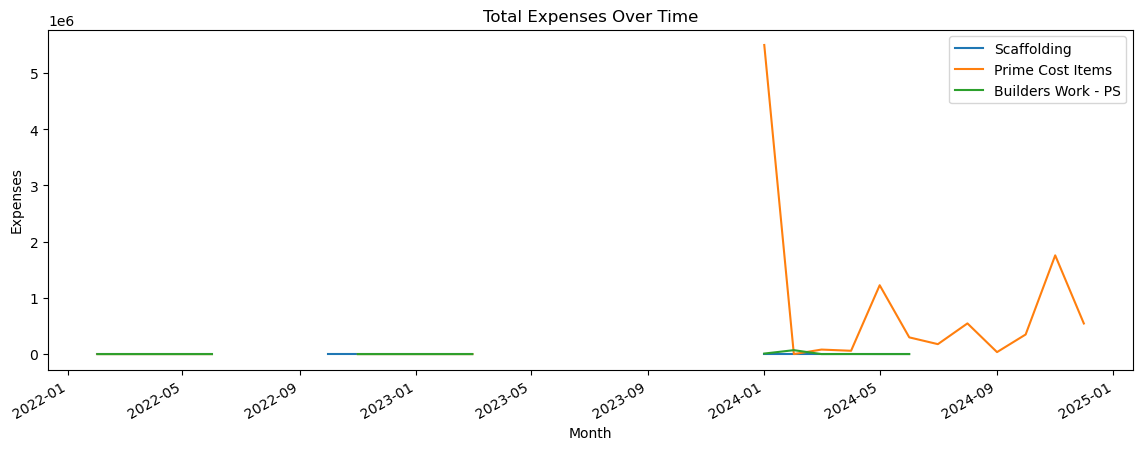

In [7]:

# Step 3:  EDA (Visualize if needed)
df.plot(figsize=(14, 5))
plt.title("Total Expenses Over Time")
plt.ylabel("Expenses")
plt.show()



In [8]:
print(df.isnull().sum())

Direct Manpower                 2
Labour Supply                   3
Labour Subcontracts             3
Staff                           2
Plant & Machinery               2
Materials                       2
Subcontracts                    2
Temporary Site Facilities       2
Utilities                       2
Scaffolding                    21
Finance Charges                 2
Miscellaneous Site Expenses     2
Provisional Sum Items           8
Prime Cost Items               16
Builders Work - PS             22
Authority Charges               2
Total                           2
dtype: int64


In [9]:
# Show percentage of missing values per column (optional)
print((df.isnull().sum() / len(df)) * 100)

Direct Manpower                 5.263158
Labour Supply                   7.894737
Labour Subcontracts             7.894737
Staff                           5.263158
Plant & Machinery               5.263158
Materials                       5.263158
Subcontracts                    5.263158
Temporary Site Facilities       5.263158
Utilities                       5.263158
Scaffolding                    55.263158
Finance Charges                 5.263158
Miscellaneous Site Expenses     5.263158
Provisional Sum Items          21.052632
Prime Cost Items               42.105263
Builders Work - PS             57.894737
Authority Charges               5.263158
Total                           5.263158
dtype: float64


In [11]:

# Replace all NaN values with 0
df.fillna(0, inplace=True)

In [ ]:
df

In [13]:
# Confirm all NaNs are gone
print(df.isnull().sum().sum())  # Should print 0

0


In [15]:
# Drop columns that are fully empty
df.dropna(axis=1, how='all', inplace=True)

# Drop rows that are fully empty
df.dropna(axis=0, how='all', inplace=True)

In [17]:
df=df.loc[:,(df !=0).any(axis=0)]

In [19]:
df.dtypes

Direct Manpower                 object
Labour Supply                   object
Labour Subcontracts             object
Staff                           object
Plant & Machinery               object
Materials                       object
Subcontracts                    object
Temporary Site Facilities       object
Utilities                       object
Finance Charges                 object
Miscellaneous Site Expenses     object
Provisional Sum Items           object
Prime Cost Items               float64
Builders Work - PS             float64
Authority Charges               object
Total                           object
dtype: object

In [20]:
# Clean numbers: remove commas, spaces, convert to float
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.replace(',', '')
        df[col] = df[col].str.strip()
        df[col] = pd.to_numeric(df[col], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_13952\168600677.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(str).str.replace(',', '')
C:\Users\HP\AppData\Local\Temp\ipykernel_13952\168600677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.strip()
C:\Users\HP\AppData\Local\Temp\ipykernel_13952\168600677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [21]:
df.dtypes

Direct Manpower                float64
Labour Supply                  float64
Labour Subcontracts            float64
Staff                          float64
Plant & Machinery              float64
Materials                      float64
Subcontracts                   float64
Temporary Site Facilities      float64
Utilities                      float64
Finance Charges                float64
Miscellaneous Site Expenses    float64
Provisional Sum Items          float64
Prime Cost Items               float64
Builders Work - PS             float64
Authority Charges              float64
Total                          float64
dtype: object

In [23]:
df=df.iloc[:-2]

In [25]:
# Replace all NaN values with 0
df.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_13952\1257325915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [ ]:
# Confirm all NaNs are gone
print(df.isnull().sum().sum())  # Should print 0

<Axes: >

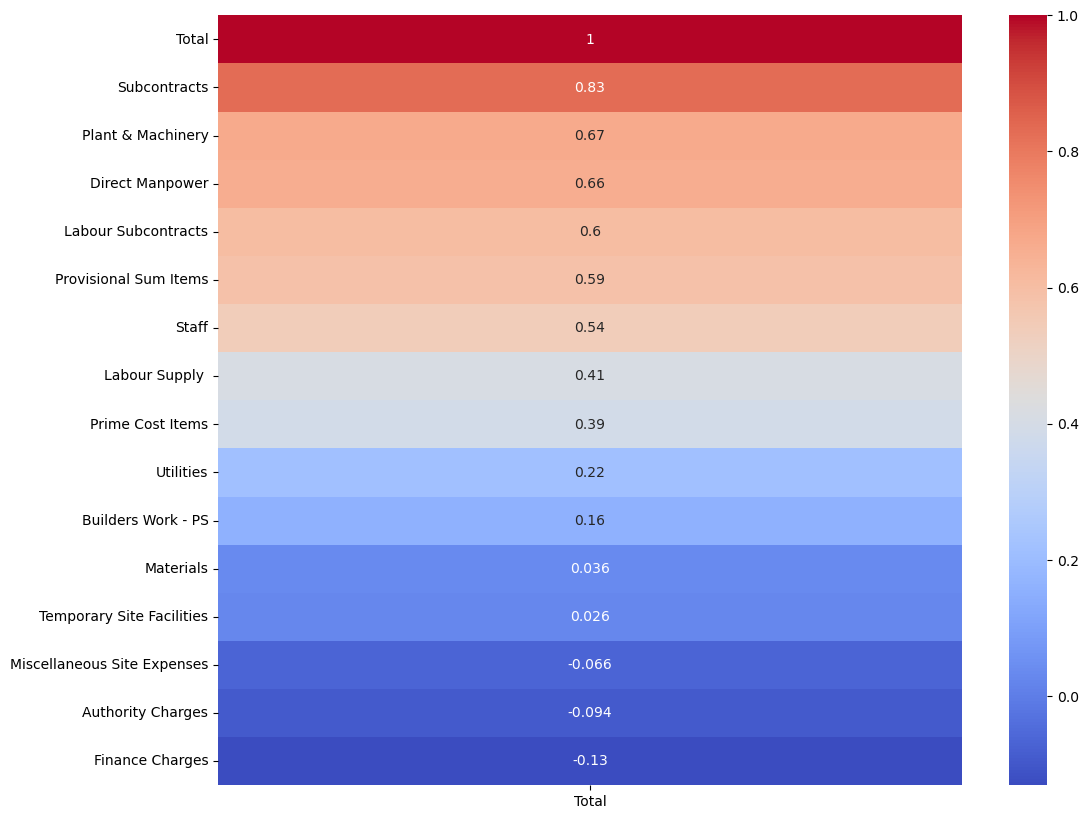

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[['Total']].sort_values(by='Total', ascending=False), annot=True, cmap='coolwarm')

In [29]:
# Step 4: Prepare features and target
features = df.drop(columns=['Total'])
target = df['Total']

In [30]:
# Step 5: Split into train/test (Last 6 months as test)
train_features = features[:-6]
test_features = features[-6:]
train_target = target[:-6]
test_target = target[-6:]

In [31]:
# Step 6: Train a model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_features, train_target)

RandomForestRegressor(random_state=42)

In [32]:
# Step 7: Evaluate model on test set
predictions = model.predict(test_features)
print("Test Results:")
print("RMSE:", np.sqrt(mean_squared_error(test_target, predictions)))
print("MAE:", mean_absolute_error(test_target, predictions))
print("R2 Score:", r2_score(test_target, predictions))

Test Results:
RMSE: 1961029.2227867134
MAE: 1481262.0422416658
R2 Score: -10.83563322598159


Result Overview:

Metric	Value
RMSE (Root Mean Squared Error)	1,961,029
MAE (Mean Absolute Error)	1,481,262
R² Score (Coefficient of Determination)	-10.83


1. RMSE & MAE (Error Sizes)
These show how far predictions are from actual values, on average:

An MAE of ~1.5 million means your predictions are off by ~1.5M per month on average.
RMSE being even higher suggests some very large individual prediction errors (likely outliers).
average expenses are ~10M per month, this is a 15–20% error, which might be tolerable. But if they're ~2M, the model is basically useless.

2. R² Score = -10.83
This is very bad:

R² < 0 means  model performs worse than simply predicting the mean every time.

This often happens when:
Data is poorly scaled or unclean
Features have little to no predictive power
Model is overfitting or underfitting badly



In [34]:
# Predict using just the mean of training target
y_pred_baseline = [train_target.mean()] * len(test_target)

from sklearn.metrics import r2_score
print("Baseline R²:", r2_score(test_target, y_pred_baseline))

Baseline R²: -4.490754241261058


Output review :

R² measuresthe variance in the target variable.
It ranges from −∞ to 1.
1 means perfect fit (all points predicted exactly).
0 means the model predicts no better than the mean of the target.
Negative values mean the model is worse than predicting the mean.

1. data might not be stationary or consistent over time
Large shifts or trends in your expenses may make simple averages useless.

Maybe the scale of expenses changed drastically between train and test.

2. Train/test split might be wrong

Check for any data leakage or incorrect indexing.

3. Data quality issues
Maybe some of test months have missing or incorrect values.

Outliers or zeros in the target might heavily skew metrics.

In [36]:
print("Train target summary:")
print(train_target.describe())

print("\nTest target summary:")
print(test_target.describe())

print("\nTest target values:")
print(test_target.values)

Train target summary:
count    3.000000e+01
mean     5.278181e+06
std      3.288581e+06
min      8.285790e+05
25%      2.328816e+06
50%      4.890930e+06
75%      6.738842e+06
max      1.292989e+07
Name: Total, dtype: float64

Test target summary:
count    6.000000e+00
mean     4.070234e+06
std      6.244231e+05
min      3.120995e+06
25%      3.677836e+06
50%      4.283192e+06
75%      4.459096e+06
max      4.740242e+06
Name: Total, dtype: float64

Test target values:
[4487784.641 4193353.735 4740241.873 3120995.183 3505997.165 4373030.548]


test set’s Total values are clustered in a narrower and lower range compared to the training data, which spans a wider range and higher values.
he test set’s std dev is much smaller, meaning expenses are more stable there.
Because your model is trained on a wide range including very high values but tested on mostly lower values, it struggles to predict well in that range.



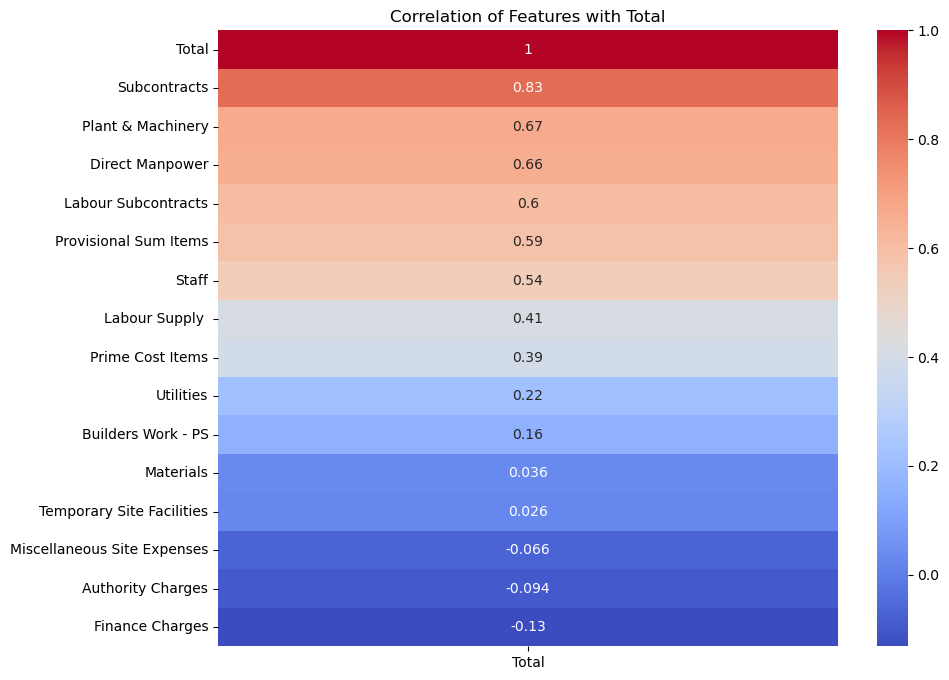

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Visualize correlation with Total Expenses
plt.figure(figsize=(10, 8))
sns.heatmap(corr[['Total']].sort_values(by='Total', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Total')
plt.show()

In [39]:
baseline_pred = [train_target.mean()] * len(test_target)

from sklearn.metrics import r2_score, mean_absolute_error
print("Baseline MAE:", mean_absolute_error(test_target, baseline_pred))
print("Baseline R²:", r2_score(test_target, baseline_pred))

Baseline MAE: 1207947.2255666663
Baseline R²: -4.490754241261058


In [40]:
# Step 3: Try Simpler Model (Linear Regression)

from sklearn.linear_model import LinearRegression

# Train linear regression
lr_model = LinearRegression()
lr_model.fit(train_features, train_target)

# Predict
lr_preds = lr_model.predict(test_features)

# Evaluate
print("Linear Regression MAE:", mean_absolute_error(test_target, lr_preds))
print("Linear Regression R²:", r2_score(test_target, lr_preds))

Linear Regression MAE: 0.0005612762955327829
Linear Regression R²: 1.0


Output overview :

that MAE near zero and R² = 1.0 sounds too perfect — it usually means:

Possible reasons for perfect Linear Regression results
Data leakage —  test set might be overlapping or the same as the training set, so the model "sees" the answers.

Target or features are identical between train and test, or features perfectly predict target (e.g., target included as feature).

Data preprocessing error — like fitting and predicting on the same dataset without splitting.

In [42]:
print("Train and Test overlap:", set(train_features.index).intersection(set(test_features.index)))
print("Train Target shape:", train_target.shape)
print("Test Target shape:", test_target.shape)

Train and Test overlap: set()
Train Target shape: (30,)
Test Target shape: (6,)


In [43]:
# Step 8: Forecast Next 6 Months (Jan 2025 to Jun 2025)
# You need future values of input features here
# For demo, we’ll assume average of last 6 months for future values

future_features = test_features.mean().to_frame().T
future_features = pd.concat([future_features]*6, ignore_index=True)

In [44]:
# You can optionally update months for clarity
future_months = pd.date_range(start='2025-01-01', periods=6, freq='MS')
future_predictions = model.predict(future_features)

In [45]:
forecast_df = pd.DataFrame({
    "Month": future_months,
    "Predicted Total Expenses": future_predictions
})
print("\nForecast for Jan–Jun 2025:")
print(forecast_df)


Forecast for Jan–Jun 2025:
       Month  Predicted Total Expenses
0 2025-01-01              6.248381e+06
1 2025-02-01              6.248381e+06
2 2025-03-01              6.248381e+06
3 2025-04-01              6.248381e+06
4 2025-05-01              6.248381e+06
5 2025-06-01              6.248381e+06


In [46]:

# Optional: Save to CSV
forecast_df.to_csv("next_6_months_forecast.csv", index=False)

In [47]:
from prophet import Prophet

# Prepare data for Prophet
ts_df = df[['Total']].reset_index()
ts_df.rename(columns={'Month': 'ds', 'Total': 'y'}, inplace=True)

# Initialize and fit model
model = Prophet(yearly_seasonality=True, daily_seasonality=False, weekly_seasonality=False)
model.fit(ts_df)

13:58:51 - cmdstanpy - INFO - Chain [1] start processing
13:58:52 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
future = model.make_future_dataframe(periods=6, freq='M')
forecast = model.predict(future)

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [49]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6))

           ds          yhat    yhat_lower    yhat_upper
36 2024-12-31  1.119459e+07  8.416530e+06  1.396410e+07
37 2025-01-31  3.816271e+06  9.273093e+05  6.661428e+06
38 2025-02-28  6.841270e+06  3.787906e+06  9.643155e+06
39 2025-03-31  7.366621e+06  4.584403e+06  1.050719e+07
40 2025-04-30  4.567106e+06  1.877424e+06  7.370341e+06
41 2025-05-31  6.897964e+06  3.851983e+06  9.826907e+06


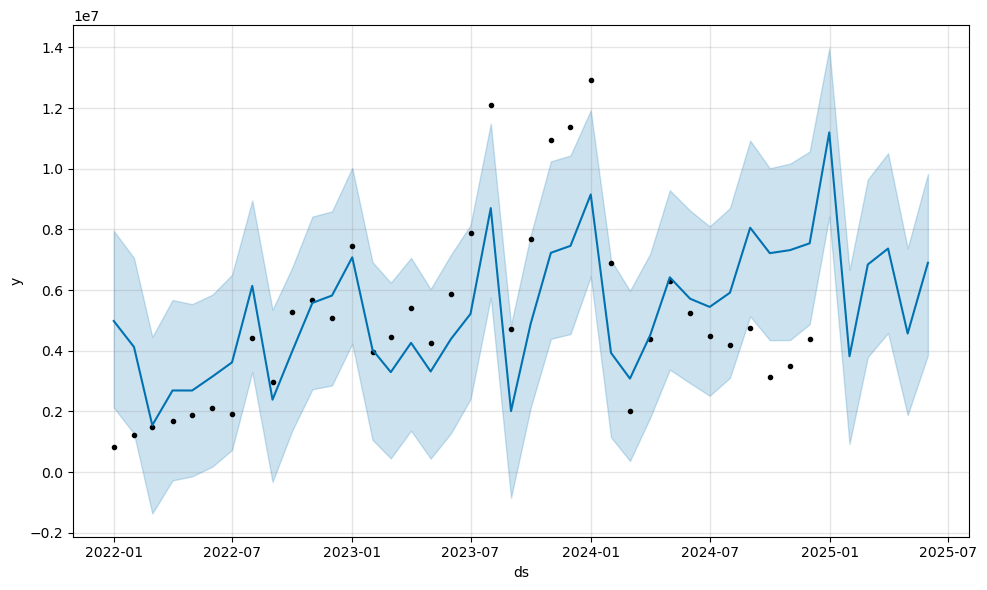

In [50]:
model.plot(forecast)
import matplotlib.pyplot as plt
plt.show()

In [51]:
target_col = 'Total'

# Use all rows except the last 6 for training
train = df[:-6]
future = df[-6:]

# Features (excluding target)
feature_cols = [col for col in df.columns if col != target_col]

X_train = train[feature_cols]
y_train = train[target_col]

X_test = future[feature_cols]
y_test = future[target_col]  # for validation (optional)

In [52]:
from xgboost import XGBRegressor

In [53]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
# Predict
y_pred = model.predict(X_test)

# Add predictions to the future DataFrame
future['Forecast'] = y_pred

C:\Users\HP\AppData\Local\Temp\ipykernel_13952\2980964430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future['Forecast'] = y_pred


In [55]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 1516695.4555
R²: -14.8829208911399


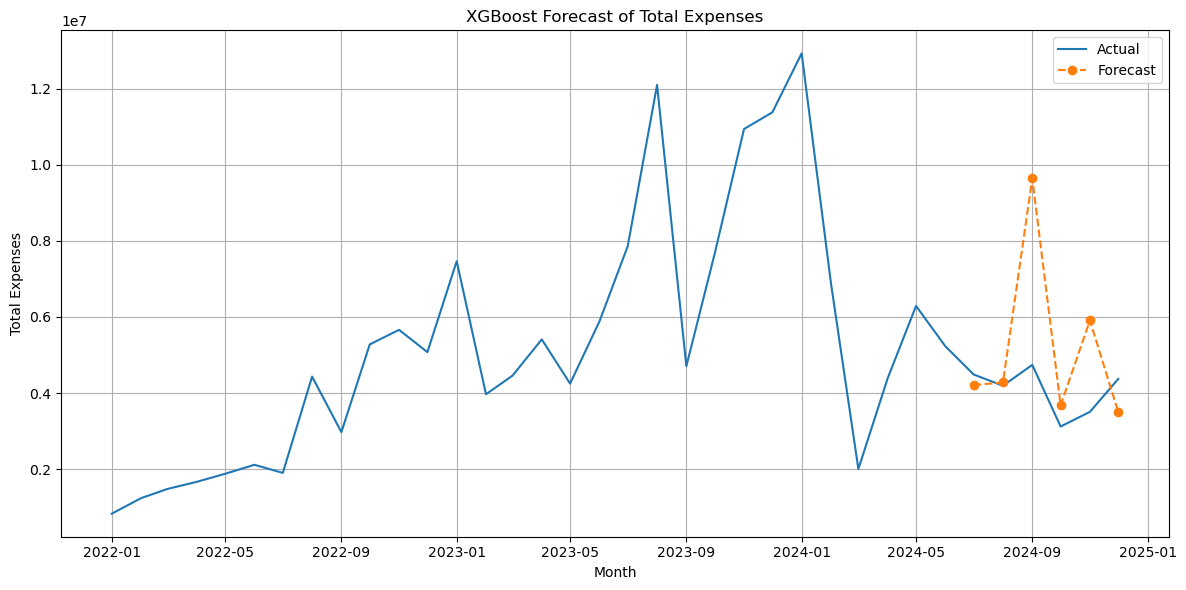

In [56]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[target_col], label='Actual')
plt.plot(future.index, future['Forecast'], label='Forecast', linestyle='--', marker='o')
plt.title('XGBoost Forecast of Total Expenses')
plt.xlabel('Month')
plt.ylabel('Total Expenses')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [57]:
pip install statsmodels pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean data
df=pd.read_csv(r"C:\Users\HP\Desktop\Doc,PB\Project1.csv")


In [63]:
df['Month'] = pd.to_datetime(df['Month'], format='%b-%y', errors='coerce')
df = df.dropna(subset=['Month'])  # Drop rows with invalid dates
df['Total'] = df['Total'].astype(str).str.replace(',', '').astype(float)
df.set_index('Month', inplace=True)
ts = df['Total']

In [65]:
print(ts.index[-1]) 

2024-12-01 00:00:00


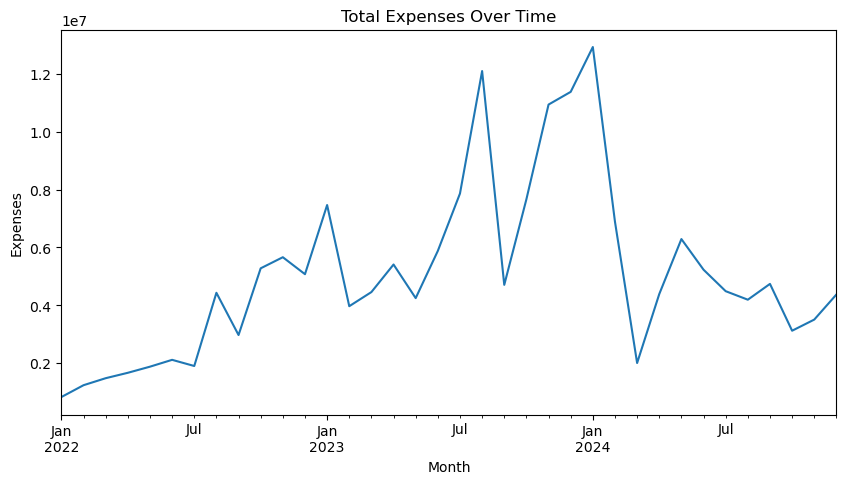

In [66]:
ts.plot(figsize=(10, 5), title="Total Expenses Over Time")
plt.ylabel("Expenses")
plt.show()

In [67]:

# Replace all NaN values with 0
df.fillna(0, inplace=True)

In [68]:
#Confirm all NaNs are gone
print(df.isnull().sum().sum())  # Should print 0

0


In [69]:
# 3. ARIMA (Auto Regressive Integrated Moving Average)

from pmdarima import auto_arima

# Automatically determine best ARIMA(p,d,q) order
arima_model = auto_arima(ts, seasonal=False, trace=True)

# Fit final model
arima_model.fit(ts)

# Forecast next 6 months
arima_forecast = arima_model.predict(n_periods=6)





Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1166.899, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1226.608, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1165.144, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1208.532, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1166.354, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1165.513, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1168.442, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1161.763, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1179.855, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1163.853, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1163.826, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1167.398, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1165.580, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.450 seconds


In [70]:
# Create future dates
future_dates = pd.date_range(ts.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')

C:\Users\HP\AppData\Local\Temp\ipykernel_13952\4032140358.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(ts.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')


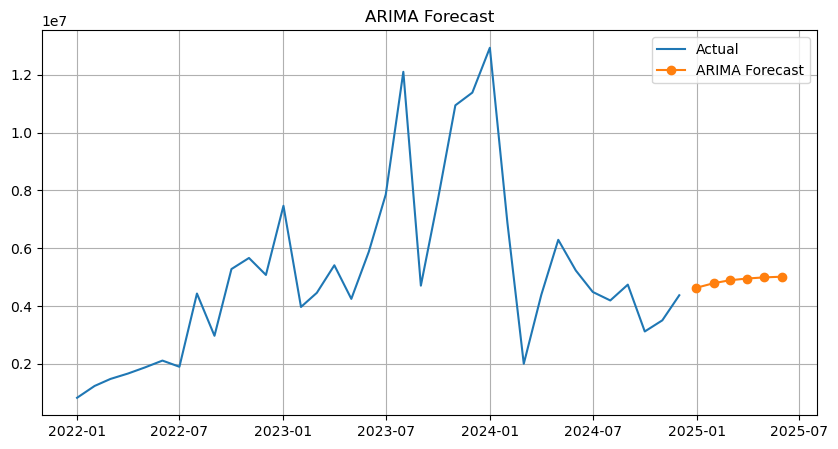

In [71]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Actual")
plt.plot(future_dates, arima_forecast, label="ARIMA Forecast", marker='o')
plt.legend()
plt.title("ARIMA Forecast")
plt.grid()
plt.show()

In [72]:
import pandas as pd

# Create future monthly dates from the end of the last valid period
future_dates = pd.date_range(start=ts.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='ME')

print(future_dates)

DatetimeIndex(['2024-12-31', '2025-01-31', '2025-02-28', '2025-03-31',
               '2025-04-30', '2025-05-31'],
              dtype='datetime64[ns]', freq='ME')


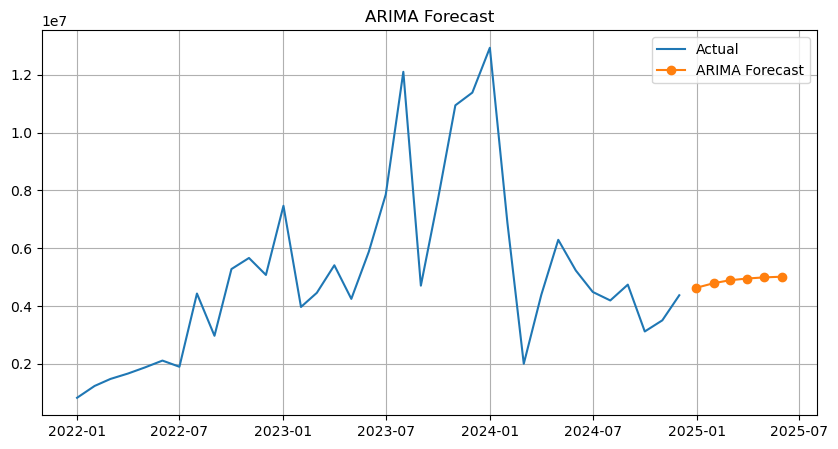

In [73]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Actual")
plt.plot(future_dates, arima_forecast, label="ARIMA Forecast", marker='o')
plt.legend()
plt.title("ARIMA Forecast")
plt.grid()
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=1169.907, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=1179.855, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=1163.748, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=1169.385, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=1226.608, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[6] intercept   : AIC=1161.763, Time=0.02 sec
 ARIMA(1,0,0)(0,0,1)[6] intercept   : AIC=1163.687, Time=0.04 sec
 ARIMA(1,0,0)(1,0,1)[6] intercept   : AIC=1165.584, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[6] intercept   : AIC=1163.853, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[6] intercept   : AIC=1163.826, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[6] intercept   : AIC=1167.398, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[6] intercept   : AIC=1165.580, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[6]             : AIC=1165.144, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[6] intercept
Total fit time: 0.676 seconds


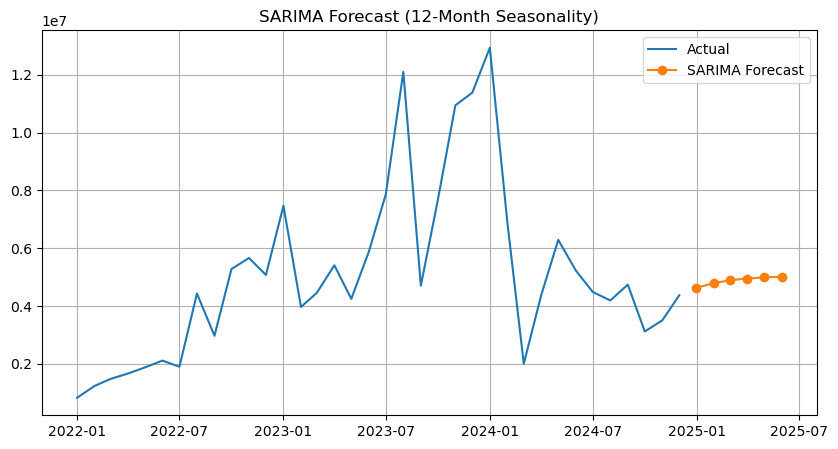

In [118]:

##✅ 4. SARIMA (Seasonal ARIMA)

# Seasonal ARIMA model selection
sarima_model = auto_arima(ts, seasonal=True, m=6, trace=True,
                          error_action='ignore', suppress_warnings=True)

# Fit final model
sarima_model.fit(ts)

# Forecast
sarima_forecast = sarima_model.predict(n_periods=6)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(ts, label="Actual")
plt.plot(future_dates, sarima_forecast, label="SARIMA Forecast", marker='o')
plt.legend()
plt.title("SARIMA Forecast (12-Month Seasonality)")
plt.grid()
plt.show()

In [120]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
manual_model = SARIMAX(ts, order=(1, 0, 0), seasonal_order=(1, 0, 0, 6))
manual_results = manual_model.fit(disp=False)

print(manual_results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                   36
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood                -580.550
Date:                           Sat, 14 Jun 2025   AIC                           1167.100
Time:                                   14:12:54   BIC                           1171.850
Sample:                               01-01-2022   HQIC                          1168.758
                                    - 12-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8938      0.049     18.379      0.000       0.798       0.989
ar.S.L6        0.0361      0.142      0.254

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


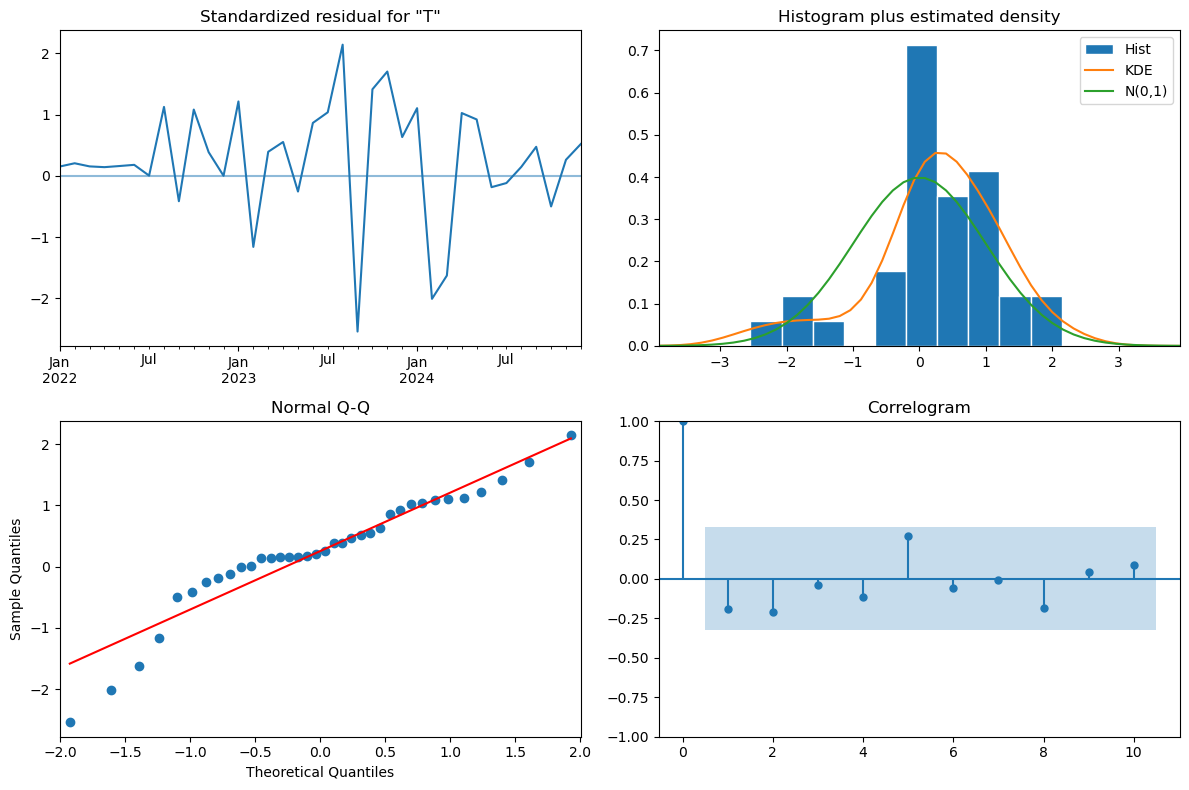

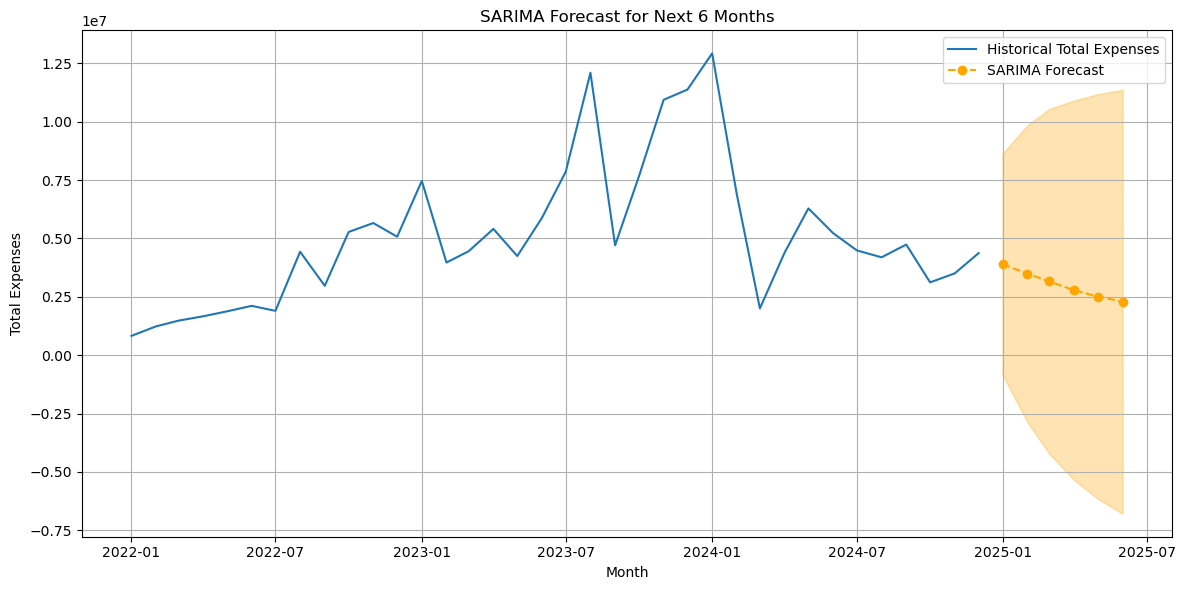

In [122]:
manual_results.plot_diagnostics(figsize=(12, 8))
plt.tight_layout()
plt.show()

# 3. Forecast next 6 months
forecast_steps = 6
sarima_forecast = manual_results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=ts.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='ME')

# Get forecast mean and confidence intervals
forecast_mean = sarima_forecast.predicted_mean
conf_int = sarima_forecast.conf_int()

# 4. Plot actual + forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(ts, label='Historical Total Expenses')
plt.plot(forecast_index, forecast_mean, label='SARIMA Forecast', marker='o', linestyle='--', color='orange')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title("SARIMA Forecast for Next 6 Months")
plt.xlabel("Month")
plt.ylabel("Total Expenses")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [94]:
# Forecast next 6 months
forecast_steps = 6
sarima_forecast = manual_results.get_forecast(steps=forecast_steps)

# Get forecasted mean values
forecast_values = sarima_forecast.predicted_mean

# Print forecast values with dates
print("Next 6 months forecasted Total Expenses:")
for date, value in zip(forecast_values.index, forecast_values.values):
    print(f"{date.strftime('%Y-%m')}: {value:.2f}")

Next 6 months forecasted Total Expenses:
2025-01: 3917175.06
2025-02: 3524787.18
2025-03: 3177188.23
2025-04: 2853545.12
2025-05: 2563017.83
2025-06: 2302120.83


In [132]:
forecast_df = pd.DataFrame({
    'Month': future_dates,
    'ARIMA Forecast': arima_forecast,
    'SARIMA Forecast': forecast_values
})
forecast_df.set_index('Month', inplace=True)
print(forecast_df)

            ARIMA Forecast  SARIMA Forecast
Month                                      
2024-12-31    4.630883e+06     3.917175e+06
2025-01-31    4.791031e+06     3.524787e+06
2025-02-28    4.890496e+06     3.177188e+06
2025-03-31    4.952273e+06     2.853545e+06
2025-04-30    4.990641e+06     2.563018e+06
2025-05-31    5.014471e+06     2.302121e+06


In [79]:
print("ARIMA forecast:", len(arima_forecast))
print("SARIMA forecast:", len(sarima_forecast))
print("Future dates:", len(future_dates))

ARIMA forecast: 6


TypeError: object of type 'PredictionResultsWrapper' has no len()

In [ ]:
# Ensure all arrays are of length 6
forecast_df = pd.DataFrame({
    'Month': future_dates,
    'ARIMA Forecast': arima_forecast[:6],
    'SARIMA Forecast': sarima_forecast[:6]
})
forecast_df.set_index('Month', inplace=True)
print(forecast_df)

In [110]:
print(test)
print("Any zero values in test data:", (test == 0).any())

Month
2024-07-01    4487784.641
2024-08-01    4193353.735
2024-09-01    4740241.873
2024-10-01    3120995.183
2024-11-01    3505997.165
2024-12-01    4373030.548
Name: Total, dtype: float64
Any zero values in test data: False


In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train-test split
train = ts[:-6]
test = ts[-6:]

# Fit SARIMA on training data
from statsmodels.tsa.statespace.sarimax import SARIMAX
manual_model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 6))
manual_results = manual_model.fit(disp=False)

print(manual_results.summary())

# Forecast same length as test
forecast = results.get_forecast(steps=len(test))
predicted = forecast.predicted_mean
predicted.index = test.index  # Align indices to test set

                                     SARIMAX Results                                     
Dep. Variable:                             Total   No. Observations:                   30
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 6)   Log Likelihood                -486.242
Date:                           Sat, 14 Jun 2025   AIC                            978.484
Time:                                   15:00:36   BIC                            982.688
Sample:                               01-01-2022   HQIC                           979.829
                                    - 06-01-2024                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8722      0.062     14.070      0.000       0.751       0.994
ar.S.L6        0.1098      0.181      0.605

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [128]:
# Metrics
mae = mean_absolute_error(test, predicted)
rmse = mean_squared_error(test, predicted, squared=False)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [130]:
# MAPE
mape = np.mean(np.abs((test - predicted) / test)) * 100

# SMAPE
def smape(actual, forecast):
    return 100/len(actual) * np.sum(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)))

smape_val = smape(test.values, predicted.values)

# Output
print("ACTUAL values:\n", test.values)
print("PREDICTED values:\n", predicted.values)
print(f"\nMAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"SMAPE: {smape_val:.2f}%")


ACTUAL values:
 [4487784.641 4193353.735 4740241.873 3120995.183 3505997.165 4373030.548]
PREDICTED values:
 [4670740.49516998 4170901.5517891  3724552.83540294 3325970.09338607
 2970041.65357794 2652202.86903044]

MAE: 613809.20
RMSE: 852067.30
MAPE: 14.54%
SMAPE: 16.74%


In [ ]:

Output overview

MAPE < 10% = excellent
MAPE 10–20% = good
MAPE 20–50% = acceptable depending on the context
SMAPE being close to MAPE is also a healthy sign.

Analyse and clean the historical data has multiple features  

EDA (Exploratory Data Analysis) for Analyzing trends, seasonality, and patterns

Feature Engineering :Ensured all cost components are numeric.

Split the data set as Train-Test data

Train the model using Liner Regression, XGBoost, Prophet, ARIMA and SARIMA

Finally conclude that SARIMA is the best model and fine tuning SARIMA for better result

SARIMA has low AIC score and high accuracy 85.46%